In [1]:
import matplotlib

matplotlib.use('Agg')
from matplotlib import cm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scripts.config import params as plot_params
from locker.analysis import *
from itertools import repeat
%matplotlib inline  

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Connecting efish@134.2.92.39:3306


In [6]:
rel = Runs() * SecondOrderSignificantPeaks() * StimulusSpikeJitter() * Cells() \
      & dict(stimulus_coeff=1, eod_coeff= 0, baseline_coeff=0, refined=1, \
             am=0, n_harmonics=0) \
      & 'frequency > 0'
# & 'stimulus_coeff = 1' \

rel_beat = Runs() * SecondOrderSignificantPeaks() * StimulusSpikeJitter() * Cells() \
      & dict(stimulus_coeff=1, eod_coeff=-1, baseline_coeff=0, refined=1, \
             am=0, n_harmonics=0) \
      & 'frequency > 0'

df = pd.DataFrame(rel.fetch())
df['spread'] = df['stim_std'] / df['eod'] / 2 / np.pi
df['jitter'] = df['stim_std']  # rename to avoid conflict with std function

df2 = pd.DataFrame(rel_beat.fetch())
df2['spread'] = df2['stim_std'] / df2['eod'] / 2 / np.pi
df2['jitter'] = df2['stim_std']  # rename to avoid conflict with std function

In [14]:
print(len(df2.cell_id.unique()))
print(df2.groupby('cell_type').size()['p-unit'])
#offset = np.linspace(-0.15, 0.15, len(df2.cell_id.unique()))
#for i,cid in enumerate(df2.cell_id.unique()):
#    df2.contrast[df2.cell_id == cid] +=  offset[i]

#print(df2)

40
313


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[<matplotlib.lines.Line2D object at 0x7fa3fbe95278>, <matplotlib.lines.Line2D object at 0x7fa3fbe95860>, <matplotlib.lines.Line2D object at 0x7fa3fbe959b0>, <matplotlib.lines.Line2D object at 0x7fa3fbea15f8>, <matplotlib.lines.Line2D object at 0x7fa3fbea1a58>, <matplotlib.lines.Line2D object at 0x7fa3fbea1ba8>, <matplotlib.lines.Line2D object at 0x7fa3fbea1588>, <matplotlib.lines.Line2D object at 0x7fa3fbe64b38>, <matplotlib.lines.Line2D object at 0x7fa3fbe64c88>, <matplotlib.lines.Line2D object at 0x7fa3fbe646a0>, <matplotlib.lines.Line2D object at 0x7fa3fbe71438>, <matplotlib.lines.Line2D object at 0x7fa3fbe71c18>, <matplotlib.lines.Line2D object at 0x7fa3fbe71780>, <matplotlib.lines.Line2D object at 0x7fa3fbe76ba8>, <matplotlib.lines.Line2D object at 0x7fa3fbe76cf8>, <matplotlib.lines.Line2D object at 0x7fa3fbe76710>, <matplotlib.lines.Line2D object at 0x7fa3fbe7cc88>, <matplotlib.lines.Line2D object at 0x7fa3fbe7cdd8>, <matplotlib.lines.Line2D object at 0x7fa3fbe763c8>, <matplotlib

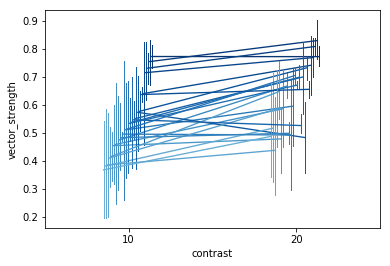

In [10]:
ax = sns.pointplot('contrast', 'vector_strength', data=df2[df2.stimulus_coeff == 1],
              order=[10, 20], hue='cell_id',
              join=True, scale=.5, errwidth=1., markers=['' for ci in pd.unique(df.cell_id)])
print(ax.lines)
unsorted_lines = []
unsorted_total = []
unsorted_yvals = []
for i,l in enumerate(ax.lines):
    if i%3==0:
        temp = l.get_data()
        unsorted_lines.append(temp[1])
        unsorted_yvals.append(temp[1][0])
    
#print(unsorted_lines)
#sorted_idx = np.argsort(np.abs(np.diff(unsorted_lines))[:,0])
#sorted_idx = [i * 3 for i in sorted_idx]

sorted_yvals = np.argsort(unsorted_yvals)
sorted_yvals = [i * 3 for i in sorted_yvals]
new_sort = []
for lin in sorted_yvals:
    new_sort.append(lin)
    new_sort.append(lin+1)
    new_sort.append(lin+2)
ax.lines = [ax.lines[i] for i in new_sort]

#sorted_total = np.array(unsorted_total)[sorted_idx]
line_cols = cm.get_cmap('Blues')
colors = line_cols(np.linspace(0.5,1,len(sorted_yvals)))
colors = [c for item in colors for c in repeat(item, 3)]

for i, (l, c) in enumerate(zip(ax.lines, colors)):
    ofs = offset[int(np.floor(i/3))]
    temp = l.get_data()
    l.set_data(([temp[0][0]+ofs, temp[0][1]+ofs], temp[1]))
    l.set_color(c)
ax.legend().set_visible(False)
        
plt.savefig('jitters.png')


In [7]:
l = ax.lines[6]
l_data = l.get_data()
print(l_data)

([-0.126, 0.874], array([0.38619468, 0.43855506]))


In [ ]:
def jitter_yvals(ax):
    unsorted_lines = []
    unsorted_total = []
    unsorted_yvals = []
    for i,l in enumerate(ax.lines):
        if i%3==0:
            temp = l.get_data()
            unsorted_lines.append(temp[1])
            unsorted_yvals.append(temp[1][0])
        
    sorted_yvals = np.argsort(unsorted_yvals)
    sorted_yvals = [i * 3 for i in sorted_yvals]

    new_sort = []
    for lin in sorted_yvals:
        new_sort.append(lin)
        new_sort.append(lin+1)
        new_sort.append(lin+2)
    ax.lines = [ax.lines[i] for i in new_sort]
    offset = np.linspace(-0.15, 0.15, len(df2.cell_id.unique()))
    for i, (l, c) in enumerate(zip(ax.lines, colors)):
        ofs = offset[int(np.floor(i/3))]
        temp = l.get_data()
        l.set_data(([temp[0][0]+ofs, temp[0][1]+ofs], temp[1]))
        l.set_color(c)